In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
weather = pd.read_csv('weather.csv')
rides = pd.read_csv('cab_rides.csv')

In [3]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [4]:
rides.dropna(axis = 0, inplace = True)

In [5]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [6]:
weather.fillna(0, inplace = True)

In [7]:
weather_avg = weather.groupby('location').mean().reset_index()
weather_avg.drop(columns = 'time_stamp' , inplace = True)
weather_source = weather_avg.rename(columns =(lambda x :x + '_source'))       
weather_source.rename(columns= {'location_source' :'source'}, inplace = True)
weather_destination = weather_avg.rename(columns =(lambda x :x+'_destination'))       
weather_destination.rename(columns= {'location_destination' :'destination'} ,inplace = True)
data = rides\
       .merge(weather_source ,on ='source')\
       .merge(weather_destination ,on = 'destination')

#binary encoding to cab_type

data['cab_type'] =data['cab_type'].replace({'Uber':1,'Lyft':0})

def one_hot_encode(df , column , prefix):
    dummy = pd.get_dummies(df[column] ,prefix = prefix)
    df = pd.concat([df , dummy] ,axis =1)
    df =df.drop(column , axis =1)
    
    return df

data = one_hot_encode(data ,column =  'destination' , prefix = 'desti')
data = one_hot_encode(data ,column =  'source' , prefix = 'src')
data = one_hot_encode(data ,column =  'product_id' , prefix = 'pid')
data = one_hot_encode(data ,column =  'name' , prefix = 'nm')

In [8]:
train, test = train_test_split(data, test_size = 0.3)

In [9]:
import os  
os.makedirs('folder/subfolder', exist_ok = True)  
train.to_csv('folder/subfolder/train_final_project.csv') 
test.to_csv('folder/subfolder/test_final_project.csv') 

In [10]:
id_list_train = list(train['id'])
rides['bool'] = rides['id'].isin(id_list_train)
train_original = rides.loc[rides['bool'], :]

id_list_test = list(test['id'])
rides['bool'] = rides['id'].isin(id_list_test)
test_original = rides.loc[rides['bool'], :]

In [43]:
train_orig_half = train_original.iloc[0:1000,:]
train_orig_half.shape

(1000, 11)

In [48]:
ols_object_basic = smf.ols(formula = 'price~distance+cab_type+time_stamp+destination+source+surge_multiplier+product_id+name', data = train_original)
model_basic = ols_object_basic.fit()
model_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.715e+05
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:34:17   Log-Likelihood:            -1.0404e+06
No. Observations:              446583   AIC:                         2.081e+06
Df Residuals:                  446548   BIC:                         2.081e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0149   1.62e-05    919.597      0.000       0.015       0.015
cab_type[T.Uber]                                      -0.7385      0.005   -150.506      0.000      -0.748      -0.729
destination[T.Beacon Hill]                            -0.3229      0.018    -17.692      0.000      -0.359      -0.287
destination[T.Boston University]                      -0.0566      0.015     -3.711      0.000      -0.087      -0.027
destination[T.Fenway]                                 -0.3767      0.015    -24.879      0.000      -0.406      -0.347
destination[T.Financial District]                      0.3944      0.018     21.591      0.000       0.359       0.430
destination[T.Haymarket Square]                        0.1478      0.015      9.611      0.000       0.118       0.178
destination[T.North End]                               0.0101      0.015      0.670      0.503      -0.019       0.040
destination[T.North Station]                           0.2005      0.018     10.965      0.000       0.165       0.236
destination[T.Northeastern University]                -0.0434      0.015     -2.897      0.004      -0.073      -0.014
destination[T.South Station]                          -0.0821      0.015     -5.428      0.000      -0.112      -0.052
destination[T.Theatre District]                        0.2336      0.018     12.821      0.000       0.198       0.269
destination[T.West End]                               -0.0483      0.018     -2.651      0.008      -0.084      -0.013
source[T.Beacon Hill]                                 -0.3155      0.018    -17.284      0.000      -0.351      -0.280
source[T.Boston University]                           -0.2947      0.015    -19.175      0.000      -0.325      -0.265
source[T.Fenway]                                      -0.0972      0.015     -6.411      0.000      -0.127      -0.067
source[T.Financial District]                           0.3518      0.018     19.104      0.000       0.316       0.388
source[T.Haymarket Square]                             0.3661      0.016     23.537      0.000       0.336       0.397
source[T.North End]                                    0.5370      0.015     35.718      0.000       0.508       0.566
source[T.North Station]                                0.0754      0.018      4.116      0.000       0.039       0.111
source[T.Northeastern University]                     -0.3124      0.015    -20.685      0.000      -0.342      -0.283
source[T.South Station]                                0.1604      0.015     10.727      0.000       0.131       0.190
source[T.Theatre District]                             0.5187      0.018     28.459      0.000       0.483  

In [12]:
np.sqrt(((test_original.price - model_basic.predict(test_original))**2).mean())

2.5035111618769643

In [13]:
np.sqrt(model_basic.mse_resid)

2.4862828447118144

In [45]:
out = model_basic.outlier_test()

NameError: name 'out' is not defined

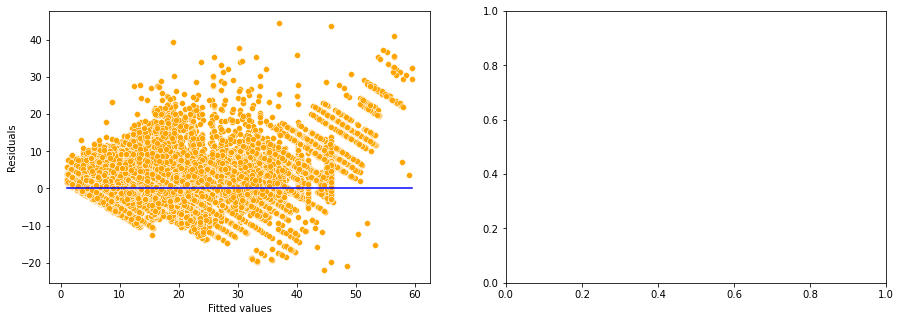

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(ax = axes[0], x = (model_basic.fittedvalues), y = (model_basic.resid),color = 'orange')
sns.lineplot(ax = axes[0], x = [model_basic.fittedvalues.min(), model_basic.fittedvalues.max()], y = [0,0], color = 'blue')
axes[0].set_xlabel('Fitted values') 
axes[0].set_ylabel('Residuals')

sns.scatterplot(ax = axes[1], x = (model_basic.fittedvalues), y = (out.student_resid),color = 'orange')
sns.lineplot(ax = axes[1], x = [model_basic.fittedvalues.min(), model_basic.fittedvalues.max()], y = [0,0], color = 'blue')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Studentized Residuals')

In [17]:
import statsmodels.api as sm

In [49]:
#take a look at high leverage points
influence = model_basic.get_influence()
leverage = influence.hat_matrix_diag
#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

In [51]:
standardized_residuals

array([ 1.42211664,  1.06802524, -0.4324371 , ...,  0.31198972,
        1.28574998,  1.88666952])

In [50]:
#calculate number of high leverage points
average_leverage = (model_basic.df_model+1)/model_basic.nobs

high_leverage_threshold = 4*average_leverage

np.sum(leverage>high_leverage_threshold)

1104

In [22]:
#remove high leverage
train_orig_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [23]:
ols_object_distance = smf.ols(formula = 'price~distance', data = train_original)
model_distance = ols_object_distance.fit()
model_distance.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                 6.001e+04
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:58:53   Log-Likelihood:            -1.6024e+06
No. Observations:              446583   AIC:                         3.205e+06
Df Residuals:                  446581   BIC:                         3.205e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3540      0.028    363.992      0.000      10.298      10.410
distance       2.8280      0.012    244.972      0.000       2.805       2.851
==============================================================================
Omnibus:                    47856.322   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66554.436
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                       3.805   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
np.sqrt(((test_original.price - model_distance.predict(test_original))**2).mean())

8.751933744449495

In [25]:
np.sqrt(model_distance.mse_resid)

8.751554026422484

In [30]:
out = model_distance.outlier_test()
out

KeyboardInterrupt: 

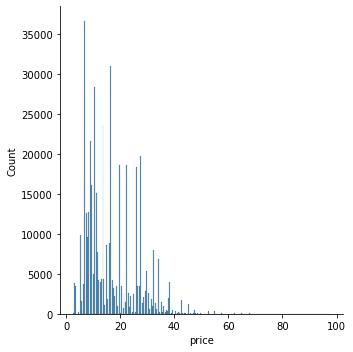

In [26]:
sns.displot(data = train, x = 'price', kind = 'hist')

In [27]:
new_train = train.copy()
new_train = new_train.drop(['price', 'id'], axis = 1)
new_train['log_distance'] = new_train['distance'].apply(lambda x: np.log(x))

In [28]:
new_test = test.copy()
new_test = new_test.drop(['price', 'id'], axis = 1)
new_test['log_distance'] = new_test['distance'].apply(lambda x: np.log(x))

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

#Taking the log transform of house_price as house prices have a right-skewed distribution
y = np.log(train.price)

#Standardizing predictors so that each of them have zero mean and unit variance

#Filtering all predictors
X = new_train; 

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)
    
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);

#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-0.4,0.2],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);

#Test dataset
Xtest = new_test

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

#RMSE on test data
np.sqrt(((np.exp(pred)-test.price)**2).mean())

In [ ]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)
    
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);

#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);

#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

#RMSE on test data
np.sqrt(((np.exp(pred)-test.price)**2).mean())

In [ ]:
A. A